In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from google.colab import drive
from glob import glob
from datetime import datetime

In [4]:
drive.mount('/content/drive')
os.chdir('/content/drive/MyDrive/BME_580/dataset/COVID-19-master')

Mounted at /content/drive


In [5]:
# Load the data set from HealthData.gov
# The initial data has 117 columns in total, here we only select necessary 
# information as be used in model building.

filepath = 'COVID-19_Reported_Patient_Impact_and_Hospital_Capacity_by_State_Timeseries.csv'
hosp_df = pd.read_csv(filepath, 
                      usecols=['state', 'date', 'inpatient_beds', 'inpatient_beds_coverage', 'inpatient_beds_used', 'inpatient_beds_used_coverage', 
                               'inpatient_beds_used_covid', 'inpatient_beds_used_covid_coverage', 
                               'staffed_adult_icu_bed_occupancy', 'staffed_adult_icu_bed_occupancy_coverage', 
                               'staffed_icu_adult_patients_confirmed_and_suspected_covid', 'staffed_icu_adult_patients_confirmed_and_suspected_covid_coverage',
                               'previous_day_admission_adult_covid_confirmed', 'previous_day_admission_adult_covid_confirmed_coverage',
                               'previous_day_admission_adult_covid_confirmed_18-19', 'previous_day_admission_adult_covid_confirmed_18-19_coverage',
                               'previous_day_admission_adult_covid_confirmed_20-29', 'previous_day_admission_adult_covid_confirmed_20-29_coverage',
                               'previous_day_admission_adult_covid_confirmed_30-39', 'previous_day_admission_adult_covid_confirmed_30-39_coverage',
                               'previous_day_admission_adult_covid_confirmed_40-49', 'previous_day_admission_adult_covid_confirmed_40-49_coverage',
                               'previous_day_admission_adult_covid_confirmed_50-59', 'previous_day_admission_adult_covid_confirmed_50-59_coverage',
                               'previous_day_admission_adult_covid_confirmed_60-69', 'previous_day_admission_adult_covid_confirmed_60-69_coverage',
                               'previous_day_admission_adult_covid_confirmed_70-79', 'previous_day_admission_adult_covid_confirmed_70-79_coverage',
                               'previous_day_admission_adult_covid_confirmed_80+', 'previous_day_admission_adult_covid_confirmed_80+_coverage',
                               'previous_day_admission_adult_covid_suspected_18-19', 'previous_day_admission_adult_covid_suspected_18-19_coverage',
                               'previous_day_admission_adult_covid_suspected_20-29', 'previous_day_admission_adult_covid_suspected_20-29_coverage',
                               'previous_day_admission_adult_covid_suspected_30-39', 'previous_day_admission_adult_covid_suspected_30-39_coverage',
                               'previous_day_admission_adult_covid_suspected_40-49', 'previous_day_admission_adult_covid_suspected_40-49_coverage',
                               'previous_day_admission_adult_covid_suspected_50-59', 'previous_day_admission_adult_covid_suspected_50-59_coverage',
                               'previous_day_admission_adult_covid_suspected_60-69', 'previous_day_admission_adult_covid_suspected_60-69_coverage',
                               'previous_day_admission_adult_covid_suspected_70-79', 'previous_day_admission_adult_covid_suspected_70-79_coverage',
                               'previous_day_admission_adult_covid_suspected_80+', 'previous_day_admission_adult_covid_suspected_80+_coverage',
                               'deaths_covid', 'deaths_covid_coverage'], 
                      dtype={'state': 'string', 'date': 'string'})

# Count how many observations are recorded in 2020 and drop them, and change the format of 'date' to yyyy-mm-dd
n = 0
for i in range(len(hosp_df['date'])):
  hosp_df['date'][i] = hosp_df['date'][i][0:4] + '-' + hosp_df['date'][i][5:7] + '-' + hosp_df['date'][i][8:]
  if hosp_df['date'][i][:4] == '2020':
    n += 1

hosp_df = hosp_df.sort_values(by='date').reset_index(drop=True)
hosp_df = hosp_df.drop(index=range(0, n)).reset_index(drop=True)

In [6]:
# Check the data if there are missing values
hosp_df.isna().sum()

state                                                                  0
date                                                                   0
inpatient_beds                                                         0
inpatient_beds_coverage                                                0
inpatient_beds_used                                                    0
inpatient_beds_used_coverage                                           0
inpatient_beds_used_covid                                              0
inpatient_beds_used_covid_coverage                                     0
previous_day_admission_adult_covid_confirmed                           0
previous_day_admission_adult_covid_confirmed_coverage                  0
staffed_adult_icu_bed_occupancy                                        0
staffed_adult_icu_bed_occupancy_coverage                               0
staffed_icu_adult_patients_confirmed_and_suspected_covid               0
staffed_icu_adult_patients_confirmed_and_suspected_

In [7]:
# Imputation for missing values by using linear method
from sklearn.impute import SimpleImputer


for i in list(np.where(hosp_df.isna().sum())):
  hosp_df.iloc[:, i] = hosp_df.iloc[:, i].interpolate(method='linear')

In [8]:
# Calculate the total number of confirmed individuals of each age group, delete the columns of the number of hosptials reported
for i in range(2, 47, 2):
  hosp_df.iloc[:, i] = hosp_df.iloc[:, i].mul(hosp_df.iloc[:, i+1], axis=0)
hosp_df = hosp_df.drop(hosp_df.columns[[range(3, 48, 2)]], axis=1).reset_index(drop=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexes/base.py:4616: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  result = getitem(key)


In [9]:
hosp_df.head(10)

,state,date,inpatient_beds,inpatient_beds_used,inpatient_beds_used_covid,previous_day_admission_adult_covid_confirmed,staffed_adult_icu_bed_occupancy,staffed_icu_adult_patients_confirmed_and_suspected_covid,previous_day_admission_adult_covid_confirmed_18-19,previous_day_admission_adult_covid_confirmed_20-29,...,previous_day_admission_adult_covid_confirmed_80+,previous_day_admission_adult_covid_suspected_18-19,previous_day_admission_adult_covid_suspected_20-29,previous_day_admission_adult_covid_suspected_30-39,previous_day_admission_adult_covid_suspected_40-49,previous_day_admission_adult_covid_suspected_50-59,previous_day_admission_adult_covid_suspected_60-69,previous_day_admission_adult_covid_suspected_70-79,previous_day_admission_adult_covid_suspected_80+,deaths_covid
0,NE,2021-01-01,539542.0,340774.0,55400.0,5050.0,34300.0,13600.0,0.0,202.0,...,1212.0,100.0,100.0,300.0,100.0,200.0,300.0,500.0,700.0,1300.0
1,IN,2021-01-01,3087102.0,1885262.0,426236.0,81340.0,270746.0,104140.0,332.0,1660.0,...,18592.0,164.0,984.0,1148.0,1148.0,2460.0,5248.0,5248.0,6396.0,8364.0
2,MI,2021-01-01,3759696.0,2621484.0,410958.0,37422.0,329508.0,94642.0,320.0,1760.0,...,8320.0,0.0,780.0,1248.0,1248.0,1560.0,3432.0,3276.0,3900.0,6478.0
3,NC,2021-01-01,3163908.0,2328084.0,451712.0,56628.0,271260.0,104064.0,396.0,2244.0,...,14916.0,128.0,2176.0,2688.0,3712.0,5248.0,7296.0,9088.0,7040.0,7424.0
4,IA,2021-01-01,1020726.0,592074.0,73656.0,10962.0,60858.0,14508.0,0.0,252.0,...,2142.0,0.0,124.0,372.0,0.0,620.0,124.0,1116.0,372.0,1364.0
5,AR,2021-01-01,1022532.0,686868.0,134397.0,22200.0,85914.0,38477.0,108.0,864.0,...,5508.0,106.0,742.0,636.0,1272.0,3074.0,6996.0,6254.0,5088.0,2725.0
6,OK,2021-01-01,1662345.0,1179477.0,301396.0,51561.0,147645.0,72027.0,0.0,1216.0,...,11016.0,150.0,450.0,1200.0,750.0,1200.0,2700.0,1800.0,3600.0,6191.0
7,CO,2021-01-01,1224704.0,786240.0,114750.0,16328.0,95992.0,31926.0,104.0,312.0,...,3328.0,102.0,408.0,816.0,1224.0,1428.0,1530.0,1122.0,1326.0,816.0
8,NV,2021-01-01,546336.0,422730.0,114863.0,10143.0,49959.0,24278.0,0.0,310.0,...,2170.0,0.0,300.0,420.0,360.0,660.0,840.0,1500.0,1080.0,1830.0
9,OR,2021-01-01,440064.0,310656.0,36208.0,4288.0,33856.0,7316.0,0.0,192.0,...,448.0,62.0,310.0,372.0,558.0,372.0,806.0,806.0,496.0,248.0


In [10]:
# Calculate the percent of 'inpatient_beds_used_covid' and 'staffed_icu_adult_patients_confirmed_and_suspected_covid'
inpatient_beds_used_covid_percent = round(hosp_df.iloc[:, 4] / hosp_df.iloc[:, 3], 2) * 100
staffed_icu_adult_patients_confirmed_and_suspected_covid_percent = round(hosp_df.iloc[:, 7]/hosp_df.iloc[:, 6], 2) * 100

hosp_df.insert(6, 'inpatient_beds_used_covid_percent', inpatient_beds_used_covid_percent)
hosp_df.insert(9, 'staffed_icu_adult_patients_confirmed_and_suspected_covid_percent', staffed_icu_adult_patients_confirmed_and_suspected_covid_percent)

In [11]:
hosp_df.head(10)

,state,date,inpatient_beds,inpatient_beds_used,inpatient_beds_used_covid,previous_day_admission_adult_covid_confirmed,inpatient_beds_used_covid_percent,staffed_adult_icu_bed_occupancy,staffed_icu_adult_patients_confirmed_and_suspected_covid,staffed_icu_adult_patients_confirmed_and_suspected_covid_percent,...,previous_day_admission_adult_covid_confirmed_80+,previous_day_admission_adult_covid_suspected_18-19,previous_day_admission_adult_covid_suspected_20-29,previous_day_admission_adult_covid_suspected_30-39,previous_day_admission_adult_covid_suspected_40-49,previous_day_admission_adult_covid_suspected_50-59,previous_day_admission_adult_covid_suspected_60-69,previous_day_admission_adult_covid_suspected_70-79,previous_day_admission_adult_covid_suspected_80+,deaths_covid
0,NE,2021-01-01,539542.0,340774.0,55400.0,5050.0,16.0,34300.0,13600.0,40.0,...,1212.0,100.0,100.0,300.0,100.0,200.0,300.0,500.0,700.0,1300.0
1,IN,2021-01-01,3087102.0,1885262.0,426236.0,81340.0,23.0,270746.0,104140.0,38.0,...,18592.0,164.0,984.0,1148.0,1148.0,2460.0,5248.0,5248.0,6396.0,8364.0
2,MI,2021-01-01,3759696.0,2621484.0,410958.0,37422.0,16.0,329508.0,94642.0,29.0,...,8320.0,0.0,780.0,1248.0,1248.0,1560.0,3432.0,3276.0,3900.0,6478.0
3,NC,2021-01-01,3163908.0,2328084.0,451712.0,56628.0,19.0,271260.0,104064.0,38.0,...,14916.0,128.0,2176.0,2688.0,3712.0,5248.0,7296.0,9088.0,7040.0,7424.0
4,IA,2021-01-01,1020726.0,592074.0,73656.0,10962.0,12.0,60858.0,14508.0,24.0,...,2142.0,0.0,124.0,372.0,0.0,620.0,124.0,1116.0,372.0,1364.0
5,AR,2021-01-01,1022532.0,686868.0,134397.0,22200.0,20.0,85914.0,38477.0,45.0,...,5508.0,106.0,742.0,636.0,1272.0,3074.0,6996.0,6254.0,5088.0,2725.0
6,OK,2021-01-01,1662345.0,1179477.0,301396.0,51561.0,26.0,147645.0,72027.0,49.0,...,11016.0,150.0,450.0,1200.0,750.0,1200.0,2700.0,1800.0,3600.0,6191.0
7,CO,2021-01-01,1224704.0,786240.0,114750.0,16328.0,15.0,95992.0,31926.0,33.0,...,3328.0,102.0,408.0,816.0,1224.0,1428.0,1530.0,1122.0,1326.0,816.0
8,NV,2021-01-01,546336.0,422730.0,114863.0,10143.0,27.0,49959.0,24278.0,49.0,...,2170.0,0.0,300.0,420.0,360.0,660.0,840.0,1500.0,1080.0,1830.0
9,OR,2021-01-01,440064.0,310656.0,36208.0,4288.0,12.0,33856.0,7316.0,22.0,...,448.0,62.0,310.0,372.0,558.0,372.0,806.0,806.0,496.0,248.0


In [12]:
# Select Ny, AL, WI, CA, and WY as our research areas
NY_df = hosp_df[hosp_df['state'] == 'NY'].drop(hosp_df.columns[[0, 2, 3, 4, 7, 8]], axis=1)
NY_df = NY_df.set_index(pd.DatetimeIndex(pd.to_datetime(NY_df['date'], format='%Y-%m-%d'))).drop(['date'], axis=1)

AL_df = hosp_df[hosp_df['state'] == 'AL'].drop(hosp_df.columns[[0, 2, 3, 4, 7, 8]], axis=1)
AL_df = AL_df.set_index(pd.DatetimeIndex(pd.to_datetime(AL_df['date'], format='%Y-%m-%d'))).drop(['date'], axis=1)

WI_df = hosp_df[hosp_df['state'] == 'WI'].drop(hosp_df.columns[[0, 2, 3, 4, 7, 8]], axis=1)
WI_df = WI_df.set_index(pd.DatetimeIndex(pd.to_datetime(WI_df['date'], format='%Y-%m-%d'))).drop(['date'], axis=1)

CA_df = hosp_df[hosp_df['state'] == 'CA'].drop(hosp_df.columns[[0, 2, 3, 4, 7, 8]], axis=1)
CA_df =CA_df.set_index(pd.DatetimeIndex(pd.to_datetime(CA_df['date'], format='%Y-%m-%d'))).drop(['date'], axis=1)

WY_df = hosp_df[hosp_df['state'] == 'WY'].drop(hosp_df.columns[[0, 2, 3, 4, 7, 8]], axis=1)
WY_df = WY_df.set_index(pd.DatetimeIndex(pd.to_datetime(WY_df['date'], format='%Y-%m-%d'))).drop(['date'], axis=1)

# Average the informations by month for these 5 areas data sets
NY_avg = NY_df.set_index(pd.DatetimeIndex(pd.to_datetime(NY_df.index, format='%Y-%m-%d'))).resample('M').mean()
AL_avg = AL_df.set_index(pd.DatetimeIndex(pd.to_datetime(AL_df.index, format='%Y-%m-%d'))).resample('M').mean()
WI_avg = WI_df.set_index(pd.DatetimeIndex(pd.to_datetime(WI_df.index, format='%Y-%m-%d'))).resample('M').mean()
CA_avg = CA_df.set_index(pd.DatetimeIndex(pd.to_datetime(CA_df.index, format='%Y-%m-%d'))).resample('M').mean()
WY_avg = WY_df.set_index(pd.DatetimeIndex(pd.to_datetime(WY_df.index, format='%Y-%m-%d'))).resample('M').mean()

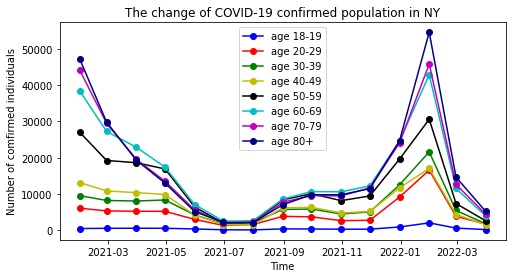

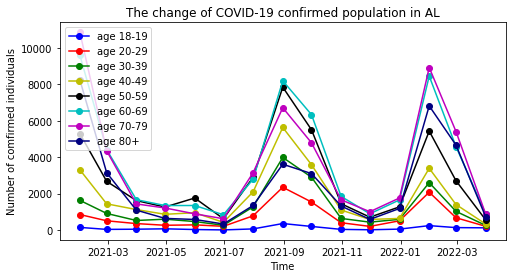

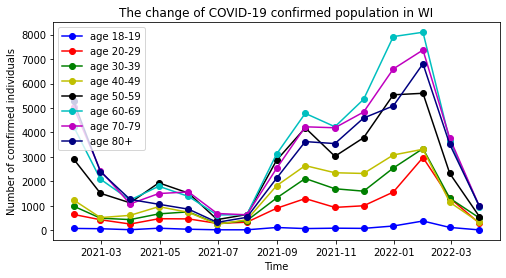

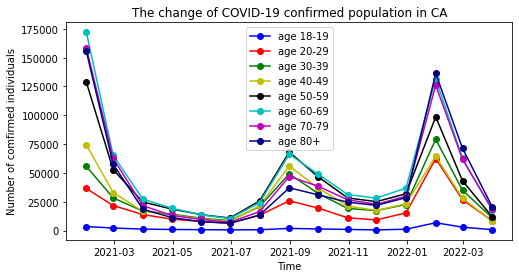

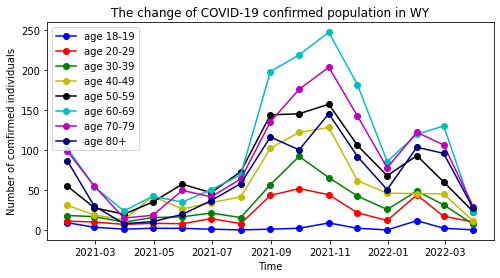

In [13]:
# Visualize the change of confirmed individuals of different age groups in different areas
month = [datetime.strptime(str(date)[:10], '%Y-%m-%d').date() for date in NY_avg.index]
avg_lst = [NY_avg, AL_avg, WI_avg, CA_avg, WY_avg]
areas = ['NY', 'AL', 'WI', 'CA', 'WY']
i = 1

for df in avg_lst:
  plt.figure(figsize=[8, 4])
  plt.plot_date(month, df['previous_day_admission_adult_covid_confirmed_18-19'], linestyle='solid', c='b', label='age 18-19')
  plt.plot_date(month, df['previous_day_admission_adult_covid_confirmed_20-29'], linestyle='solid', c='r', label='age 20-29')
  plt.plot_date(month, df['previous_day_admission_adult_covid_confirmed_30-39'], linestyle='solid', c='g', label='age 30-39')
  plt.plot_date(month, df['previous_day_admission_adult_covid_confirmed_40-49'], linestyle='solid', c='y', label='age 40-49')
  plt.plot_date(month, df['previous_day_admission_adult_covid_confirmed_50-59'], linestyle='solid', c='k', label='age 50-59')
  plt.plot_date(month, df['previous_day_admission_adult_covid_confirmed_60-69'], linestyle='solid', c='c', label='age 60-69')
  plt.plot_date(month, df['previous_day_admission_adult_covid_confirmed_70-79'], linestyle='solid', c='m', label='age 70-79')
  plt.plot_date(month, df['previous_day_admission_adult_covid_confirmed_80+'], linestyle='solid', c='navy', label='age 80+')
  plt.title('The change of COVID-19 confirmed population in ' + areas[i-1])
  plt.xlabel('Time')
  plt.ylabel('Number of comfirmed individuals')
  plt.legend()
  plt.show()
  i += 1

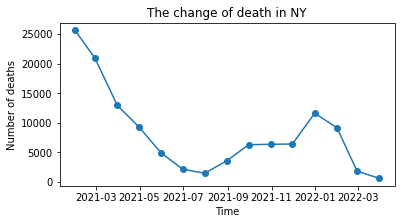

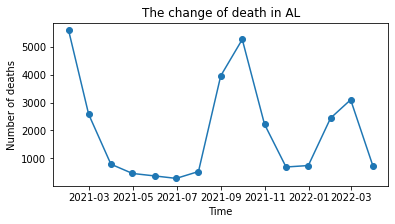

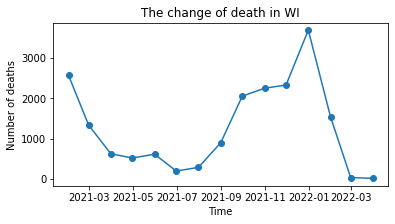

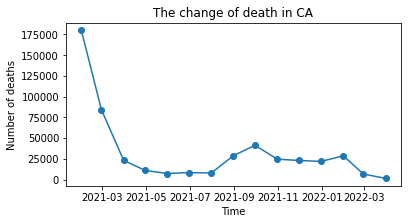

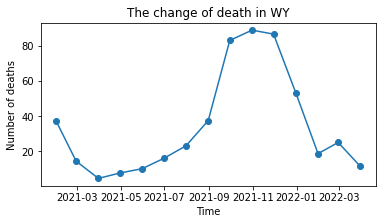

In [14]:
# Visualize the change of deaths of different age groups in different areas
i = 1
for df in avg_lst:
  plt.figure(figsize=[6, 3])
  plt.plot_date(month, df['deaths_covid'], linestyle='solid')
  plt.title('The change of death in ' + areas[i-1])
  plt.xlabel('Time')
  plt.ylabel('Number of deaths')
  plt.show()
  i += 1

In [15]:
from sklearn.preprocessing import StandardScaler


# Standardize data sets
def standardize_data(df):
  scaler = StandardScaler()
  scaled_df = scaler.fit_transform(df.iloc[:, 1:-1])
  return scaled_df

# Split the dataset into training (85%) and test (15%) set
def split_data(data):
  train_size = int(len(data)*0.85)
  test_size = len(data) - train_size
  train, test = data[:train_size], data[train_size:]
  return train, test

# Create independent and dependent variables
def create_dataset(data, option):
  scaler = StandardScaler()
  if option == 'confirmed':
    y = data['previous_day_admission_adult_covid_confirmed']
  elif option == 'death':
    y = data['deaths_covid']
  x = data.drop(['previous_day_admission_adult_covid_confirmed'], axis=1)
  return x, y

In [16]:
from fbprophet import Prophet
from sklearn.metrics import mean_squared_error, r2_score


def time_analysis(df):
  data = pd.DataFrame({'ds':df.index,
                      'y': df['previous_day_admission_adult_covid_confirmed']})
  # The argument 'changepoint_prior_scale' help adjust the trend to avoid overfitting or underfitting
  model = Prophet(weekly_seasonality=True, yearly_seasonality=True, changepoint_prior_scale=0.04)
  model.fit(data)

  # Make a new time series
  future = model.make_future_dataframe(periods=120)
  forecast = model.predict(future)

  model.plot(forecast)
  plt.scatter(data.ds, data.y)
  plt.xlabel('Date'); plt.ylabel('Confirmed individuals')
  plt.legend(['Actual', 'Predict'])

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


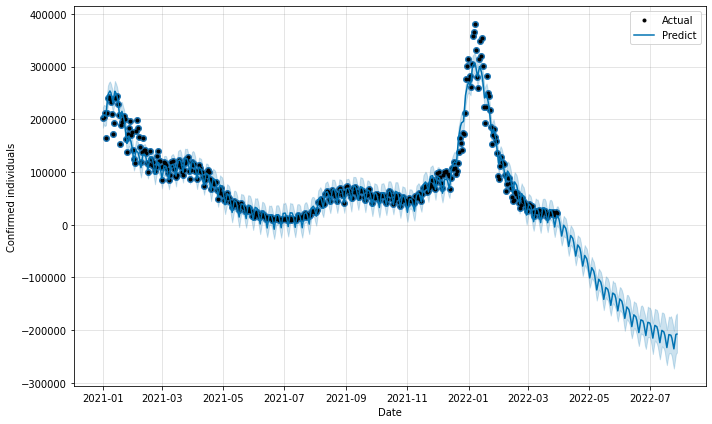

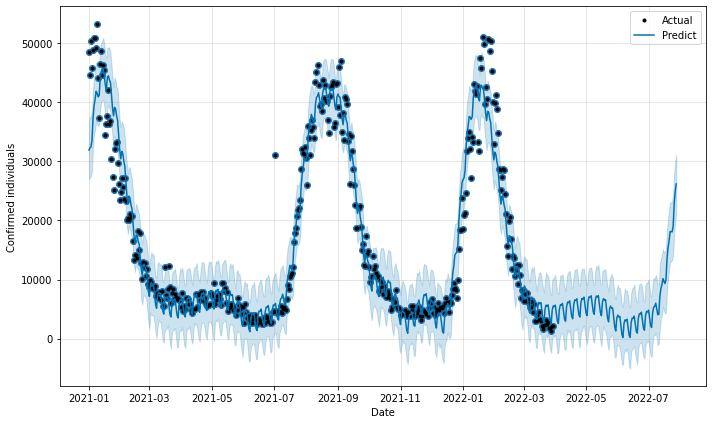

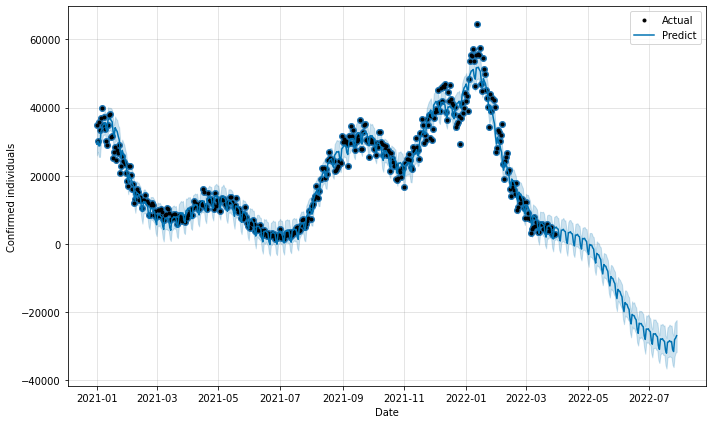

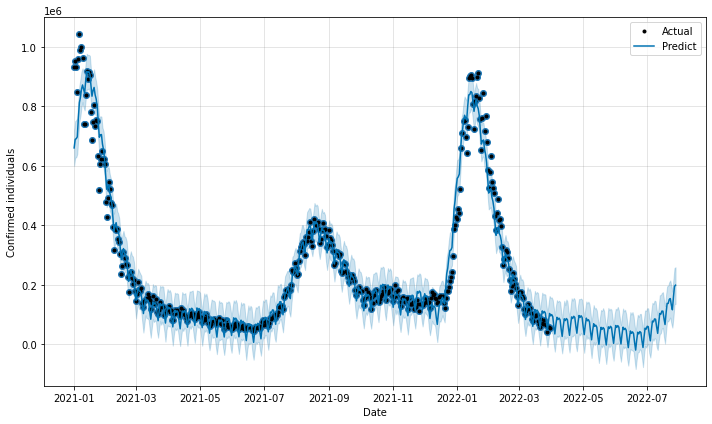

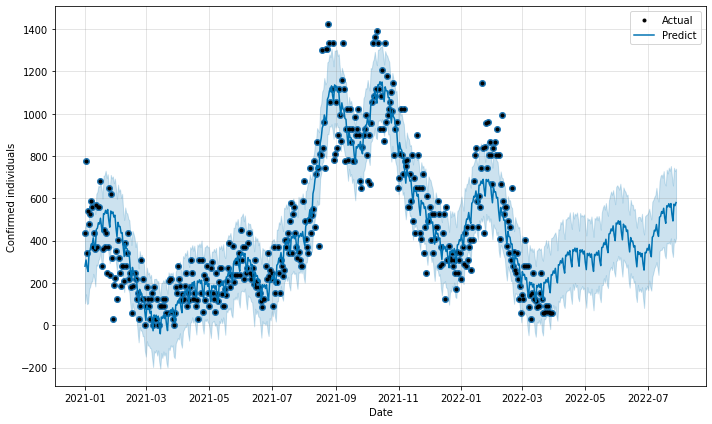

In [17]:
for df in [NY_df, AL_df, WI_df, CA_df, WY_df]:
  time_analysis(df)

In [ ]:
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis


def model(df, option):
  """
  df: pd.dataframe, the data for building the model
  option: str, a string that represents which variable in the df want to use as dependent variable
  """
  # Build the polynomial model
  train, test = split_data(df)
  x_train, y_train = create_dataset(train, option)
  x_test, y_test = create_dataset(test, option)

  date = [datetime.strptime(str(date)[:10], '%Y-%m-%d').date() for date in x_train.index]
  date_test = [datetime.strptime(str(date)[:10], '%Y-%m-%d').date() for date in x_test.index]  

  # Standardize the training and test set
  x_train, x_test = standardize_data(x_train), standardize_data(x_test)

  # Model building, using polynomial regression with regularization (lasso)
  model = make_pipeline(PolynomialFeatures(1), Lasso())
  model.fit(x_train, y_train)
  coef = model.steps[1][1].coef_


  # Evaluation for both sets
  # train_acc = model.score(x_train, y_train) # using R2 to evaluate
  test_acc = model.score(x_test, y_test)
  MSE = mean_squared_error(model.predict(x_test), y_test)
  R2 = r2_score(model.predict(x_test), y_test)
  eval_df = pd.DataFrame({'test_accuracy': [round(test_acc, 4)], 
                          'MSE': [MSE], 
                          'R2_score': [round(R2, 4)]})

  # Visualization for the training result
  plt.scatter(date, y_train, label='True labels')
  plt.plot(date, model.predict(x_train), c='r', label='Prediction')
  plt.xlabel('Time'); plt.ylabel(f'Number of {option} individuals')
  plt.title(f'Training: The change of COVID-19 {option} population')
  plt.legend()
  plt.show()

  # Visualization for the test result
  plt.scatter(date_test, y_test, label='True labels')
  plt.plot(date_test, model.predict(x_test), c='r', label='Prediction')
  plt.xlabel('Time'); plt.ylabel(f'Number of {option} individuals')
  plt.title(f'Test: The change of COVID-19 {option} population')
  plt.legend()
  plt.show()

  return coef, eval_df

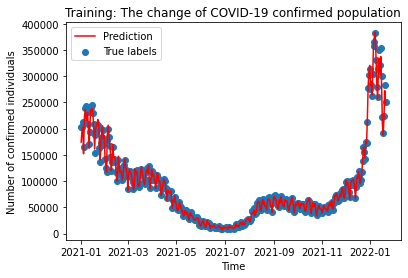

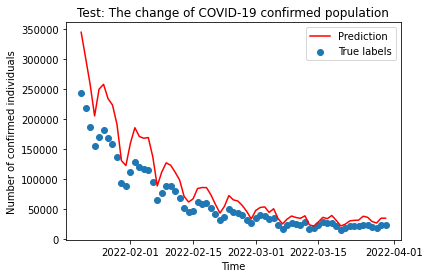

   test_accuracy           MSE  R2_score
0         0.5973  1.182824e+09    0.7972


In [ ]:
NY_coef, NY_result = model(NY_df, 'confirmed')
print(NY_result)

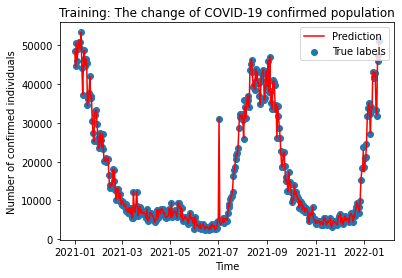

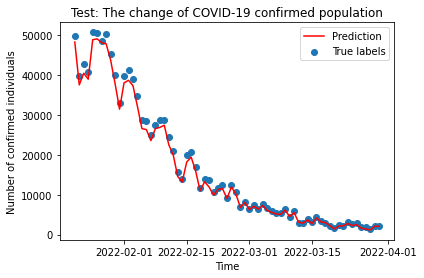

,test_accuracy,MSE,R2_score
0,0.9945,1.381960e+06,0.994


In [ ]:
AL_coef, AL_result = model(AL_df, 'confirmed')
AL_result

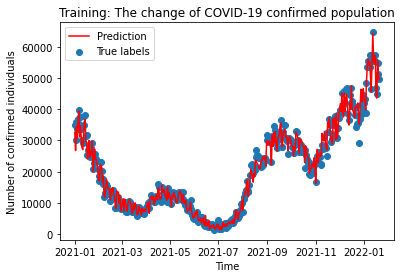

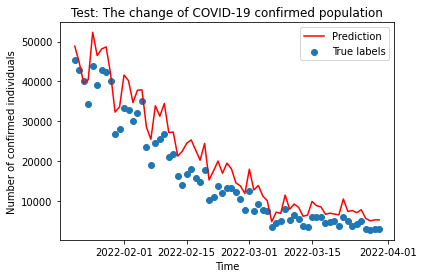

,test_accuracy,MSE,R2_score
0,0.8572,2.409359e+07,0.8764


In [ ]:
WI_coef, WI_result = model(WI_df, 'confirmed')
WI_result

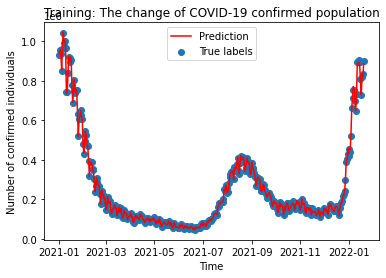

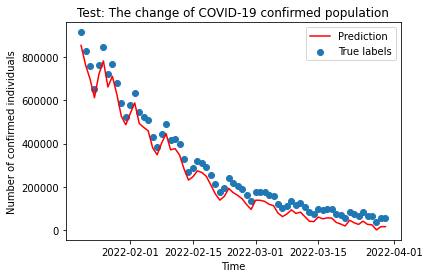

,test_accuracy,MSE,R2_score
0,0.9655,1.994950e+09,0.964


In [ ]:
CA_coef, CA_result = model(CA_df, 'confirmed')
CA_result

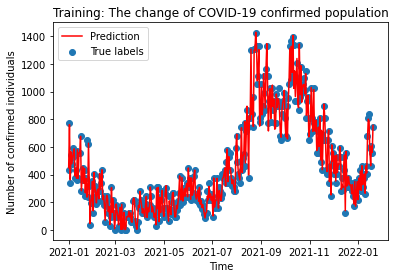

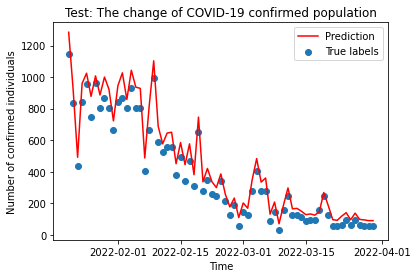

,test_accuracy,MSE,R2_score
0,0.9402,5895.919594,0.9494


In [ ]:
WY_coef, WY_result = model(WY_df, 'confirmed')
WY_result